# RP35 analysis and 2D graphics


The objective of this example is to present problem 35 of the BBRC. We also present graphic elements for the visualization of the limit state surface in 2 dimensions.

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
problem = otb.ReliabilityProblem35()

In [3]:
print(problem)

name = RP35
event = class=ThresholdEventImplementation antecedent=class=CompositeRandomVector function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x1,x2,gsys] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[gsys] formulas=[var g1 := 2 - x2 + exp(-0.1 * x1^2) + (0.2 * x1) ^ 4;var g2 := 4.5 - x1 * x2;gsys := min(g1, g2)] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[gsys] formulas=[var g1 := 2 - x2 + exp(-0.1 * x1^2) + (0.2 * x1) ^ 4;var g2 := 4.5 - x1 * x2;gsys := min(g1, g2)] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[gsys] formulas=[var g1 := 2 - x2 + exp(-0.1 * x1^2) + (0.2 * x1) ^ 4;var g2 := 4.5 - x1 * x2;gsys := min(g1, g2)] antecedent=class=U

In [4]:
event = problem.getEvent()
g = event.getFunction()

In [5]:
problem.getProbability()

0.00354

In [6]:
# Create the Monte-Carlo algorithm
algoProb = ot.ProbabilitySimulationAlgorithm(event)
algoProb.setMaximumOuterSampling(1000)
algoProb.setMaximumCoefficientOfVariation(0.01)
algoProb.run()

In [7]:
# Get the results
resultAlgo = algoProb.getResult()
neval = g.getEvaluationCallsNumber()
print("Number of function calls = %d" % (neval))
pf = resultAlgo.getProbabilityEstimate()
print("Failure Probability = %.4f" % (pf))
level = 0.95
c95 = resultAlgo.getConfidenceLength(level)
pmin = pf - 0.5 * c95
pmax = pf + 0.5 * c95
print("%.1f %% confidence interval :[%.4f,%.4f] " % (level * 100, pmin, pmax))

Number of function calls = 1000
Failure Probability = 0.0030
95.0 % confidence interval :[-0.0004,0.0064] 


## Compute the bounds of the domain

In [8]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()
X1 = distribution.getMarginal(0)
X2 = distribution.getMarginal(1)
alphaMin = 0.00001
alphaMax = 1 - alphaMin
lowerBound = ot.Point(
    [X1.computeQuantile(alphaMin)[0], X2.computeQuantile(alphaMin)[0]]
)
upperBound = ot.Point(
    [X1.computeQuantile(alphaMax)[0], X2.computeQuantile(alphaMax)[0]]
)

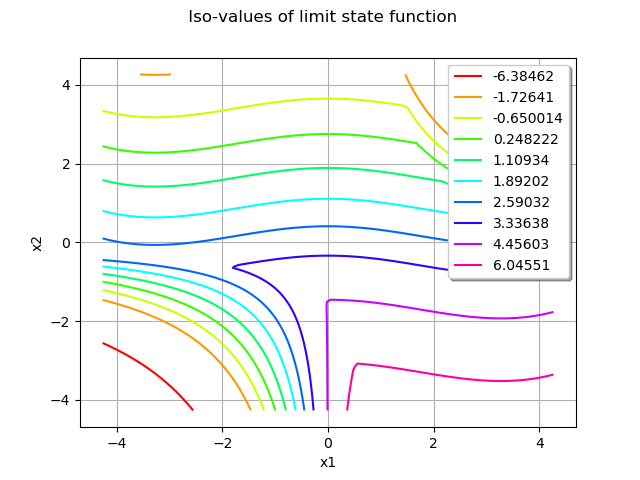

In [9]:
nbPoints = [100, 100]
figure = g.draw(lowerBound, upperBound, nbPoints)
figure.setTitle(" Iso-values of limit state function")
figure

## Print the iso-values of the distribution

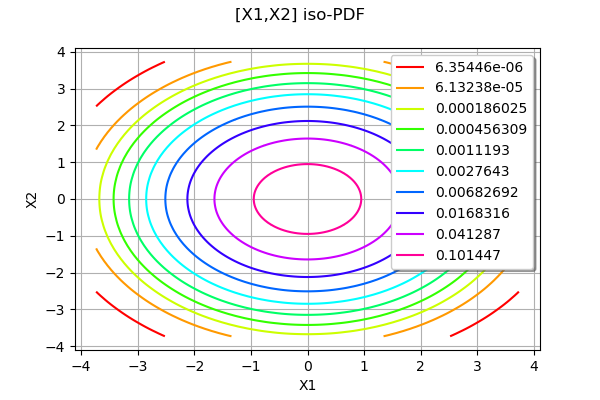

In [10]:
distribution.drawPDF()

In [11]:
sampleSize = 10000
sampleInput = inputVector.getSample(sampleSize)
sampleOutput = g(sampleInput)
drawEvent = otb.DrawEvent(event)

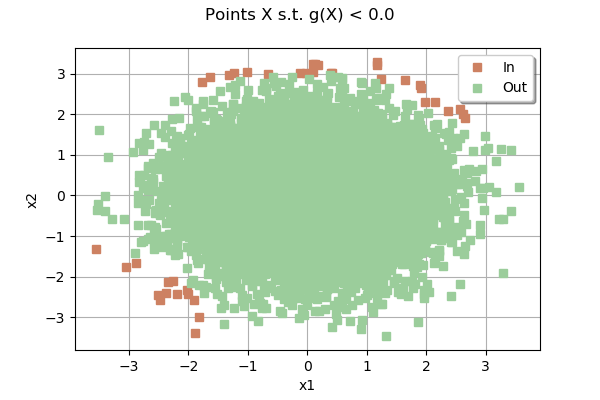

In [12]:
cloud = drawEvent.drawSample(sampleInput, sampleOutput)
cloud

## Draw the limit state surface

In [13]:
bounds = ot.Interval(lowerBound, upperBound)
bounds

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[-4.26489,-4.26489] upper bound=class=Point name=Unnamed dimension=2 values=[4.26489,4.26489] finite lower bound=[1,1] finite upper bound=[1,1]

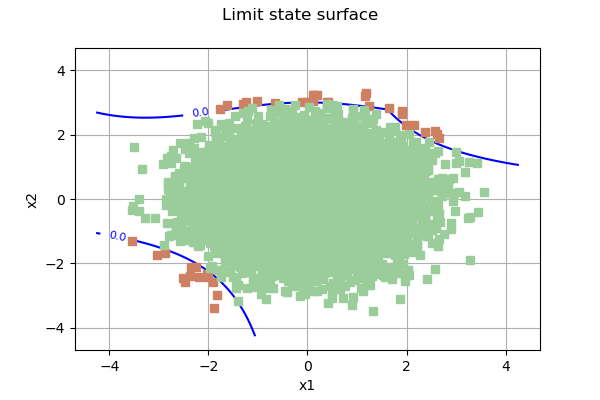

In [14]:
nX = 100
nY = 100
graph = drawEvent.drawLimitState(bounds, nX, nY)
graph.add(cloud)
graph

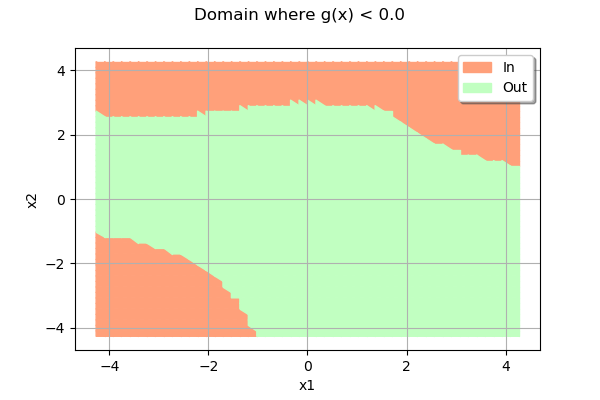

In [15]:
domain = drawEvent.fillEvent(bounds)
domain

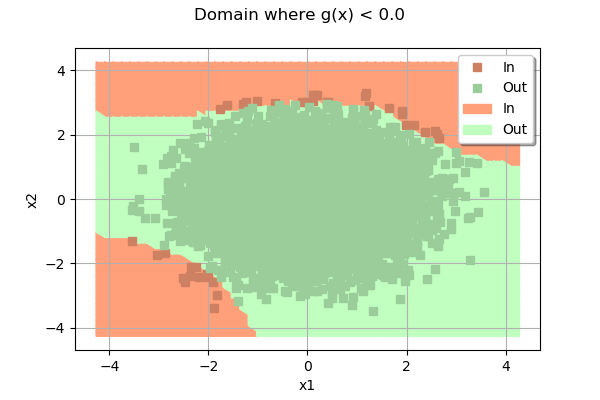

In [16]:
domain.add(cloud)
domain